# Classification Task Comparison

In [16]:
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the models
transformer_model = load_model('../models/transformer_classification_model.h5')
RNN_model = load_model('../models/RNN_classification_model.h5')

In [18]:
# Load data
train_df = pd.read_csv('../data/cleaned_train.csv')
x_train = train_df['numerical_sequence'].apply(lambda x: [int(i) for i in x.split(',')])

test_df = pd.read_csv('../data/cleaned_test.csv')
x_test = np.array(test_df['numerical_sequence'].apply(lambda x: [int(i) for i in x.split(',')]))
y_test = np.array(test_df['BERT_sentiment_score'])

In [19]:
# Get the longest sequence
max_length = max([len(seq) for seq in x_test] + [len(seq) for seq in x_train])
# Pad sequences with zeros ro have the same length
x_test = pad_sequences(x_test, maxlen= max_length, padding='post', truncating='post')

In [31]:
loss, accuracy = RNN_model.evaluate(x_test, y_test)

print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

122/122 [==============================] - 18s 126ms/step - loss: 1.2147 - accuracy: 0.5944
Validation loss: 1.2147153615951538
Validation accuracy: 0.5943712592124939


In [32]:
loss, accuracy = transformer_model.evaluate(x_test, y_test)

print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

122/122 [==============================] - 2s 16ms/step - loss: 0.9510 - accuracy: 0.6106
Validation loss: 0.9509938359260559
Validation accuracy: 0.6106377243995667


In [27]:
# Get predictions for the Transformer model
transformer_pred = transformer_model.predict(x_test)
transformer_pred_classes = np.argmax(transformer_pred, axis=1)

# Get predictions for the RNN model
RNN_pred = RNN_model.predict(x_test)
RNN_pred_classes = np.argmax(RNN_pred, axis=1)

122/122 [==============================] - 15s 126ms/step


In [28]:
# Create confusion matrices
transformer_cm = confusion_matrix(y_test, transformer_pred_classes)
RNN_cm = confusion_matrix(y_test, RNN_pred_classes)

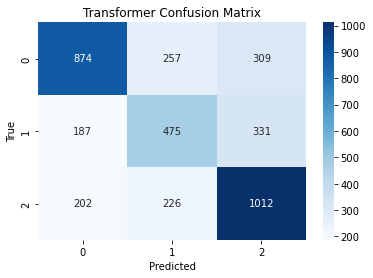

In [29]:
# Plot confusion matrices
sns.heatmap(transformer_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Transformer Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

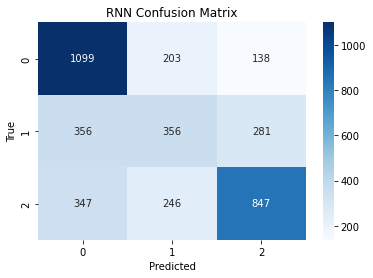

In [30]:
sns.heatmap(RNN_cm, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()